<a href="https://colab.research.google.com/github/kokoMontjane1/Adversarial-Machine-learning/blob/main/Adversarial_machine_learning_GAN_Attempt_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the script

This script uses a generative adversarial network (GAN) for adversarial machine learning on credit card data.




# A GAN is a type of deep learning model that consists of two neural networks: a generator and a discriminator. The generator is trained to generate synthetic examples that are similar to the real examples in the data. The discriminator is trained to distinguish between real and synthetic examples. The two networks are trained together in an adversarial manner, with the generator trying to fool the discriminator and the discriminator trying to correctly identify the real examples.

The script first loads the credit card data and preprocesses it by scaling the features and splitting the data into training and test sets. It then defines the generator and discriminator models using the Sequential class from Keras. The generator model takes a random noise input and generates synthetic examples, while the discriminator model takes an example and predicts whether it is real or synthetic.

The script then defines the GAN model, which combines the generator and discriminator models. The GAN model is trained on the training set using the fit method from Keras. During training, the generator generates synthetic examples and the discriminator tries to distinguish between the real and synthetic examples. The losses for the generator and discriminator are recorded and plotted at the end of each epoch.

After training, the script uses the discriminator model to predict the labels for the test set and plots the ROC curve using the roc_curve function from sklearn.metrics. It also computes and prints the confusion matrix and classification report for the model using the confusion_matrix and classification_report functions from sklearn.metrics, respectively.


# Importing the needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Loading the data using pandas

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Resampling the imbalanced dataset

In [6]:
#Fraudulent cases
number_records_fraud = len(df[df.Class==1])
number_records_non_fraud = len(df[df.Class==0])
#extract fraud and non-fraud
fraud_indices = np.array (df[df.Class==1].index)
normal_indices = np.array (df[df.Class==0].index)

#randomly obtain a number of non-fraud indices, equal to the fraud cases
#random_normal_indices = np.random.choice (normal_indices, number_records_fraud, replace = False )

#randomly obtain a number of fraud indices, equal to the non - fraud cases (majority sample)

random_fraud_indices = np.random.choice (fraud_indices, number_records_non_fraud, replace = True)

#Combine the fraud cases with the random ones
#under_sample_indices = np.concatenate ([fraud_indices, random_normal_indices])

#Combine the random fraud cases with the normal ones
under_sample_indices = np.concatenate ([normal_indices, random_fraud_indices])

#Choose values of indices

under_sample_data = df.iloc[under_sample_indices,:]

#Separate X and Y 
X_undersample = under_sample_data.iloc [:, under_sample_data.columns != 'Class']

y_undersample = under_sample_data.iloc [:, under_sample_data.columns == 'Class']

# Introducing Adversarial examples : Generative Adversarial Network


In [7]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf


# Split the data into features and target
#X = df.drop('Class', axis=1)
#y = df['Class']

# Standardize the features
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size=0.2)

# Create the GAN model

# Generative model
generator = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(X_train.shape[1], activation='tanh')
])

# Discriminative model
discriminator = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# GAN model
gan = tf.keras.Sequential([generator, discriminator])

# Compile the GAN model
gan.compile(optimizer='adam', loss='binary_crossentropy')


# Compiling the discriminator,  training the GAN and Evaluating the Model


In [9]:
import matplotlib.pyplot as plt

# Compile the discriminator model
discriminator.compile(optimizer='adam', loss='binary_crossentropy')


# Train the GAN model
losses = []
for epoch in range(50):
    # Generate fake examples
    fake_examples = generator.predict(np.random.normal(0, 1, (len(X_train), X_train.shape[1])))
    
    # Concatenate fake and real examples
    X_train_gan = np.concatenate([X_train, fake_examples])
    y_train_gan = np.concatenate([np.ones(len(X_train)), np.zeros(len(fake_examples))])
    
    # Train the discriminator on fake and real examples
    discriminator.trainable = True
    d_loss = discriminator.train_on_batch(X_train_gan, y_train_gan)
    
    # Train the generator
    noise = np.random.normal(0, 1, (len(X_train), X_train.shape[1]))
    discriminator.trainable = False
    g_loss = gan.train_on_batch(noise, np.ones(len(X_train)))

    print(f'Epoch: {epoch+1}, generator loss: {g_loss:.4f}, discriminator loss: {d_loss:.4f}')
    
    # Record the losses
    losses.append((g_loss, d_loss))

14216/14216 [==============================] - 19s 1ms/step
Epoch: 1, generator loss: 0.6102, discriminator loss: 0.3930
14216/14216 [==============================] - 18s 1ms/step
Epoch: 2, generator loss: 0.5285, discriminator loss: 0.4474
14216/14216 [==============================] - 19s 1ms/step
Epoch: 3, generator loss: 0.4457, discriminator loss: 0.5153
14216/14216 [==============================] - 18s 1ms/step
Epoch: 4, generator loss: 0.3626, discriminator loss: 0.6016
14216/14216 [==============================] - 18s 1ms/step
Epoch: 5, generator loss: 0.2828, discriminator loss: 0.7108
14216/14216 [==============================] - 22s 2ms/step
Epoch: 6, generator loss: 0.2111, discriminator loss: 0.8447
14216/14216 [==============================] - 18s 1ms/step
Epoch: 7, generator loss: 0.1505, discriminator loss: 1.0049
14216/14216 [==============================] - 18s 1ms/step
Epoch: 8, generator loss: 0.1029, discriminator loss: 1.1887
14216/14216 [===================

# Visualizing the loss function

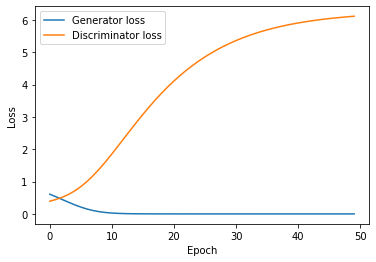

In [10]:
# Plot the losses
losses = np.array(losses)

plt.plot(losses[:,0], label='Generator loss')
plt.plot(losses[:,1], label='Discriminator loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# ROC Curve


3554/3554 [==============================] - 5s 1ms/step


Text(0, 0.5, 'True positive rate')

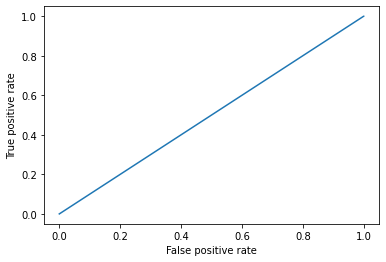

In [12]:
from sklearn.metrics import roc_curve

# Predict probabilities for the test set
y_probs = discriminator.predict(X_test).flatten()

# Compute the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

# Confusion matrix

The confusion matrix uses the following format:

 [[True negatives  False positives]
 
 [False negatives True positives]]

In [13]:
from sklearn.metrics import confusion_matrix

# Predict labels for the test set
y_pred = np.round(discriminator.predict(X_test)).flatten()

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

3554/3554 [==============================] - 6s 2ms/step
[[    0 56520]
 [    0 57206]]


# Classification report

In [15]:
from sklearn.metrics import classification_report

# Predict labels for the test set
y_pred = np.round(discriminator.predict(X_test)).flatten()

# Generate the classification report
report = classification_report(y_test, y_pred)

print(report)

3554/3554 [==============================] - 5s 1ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     56520
           1       0.50      1.00      0.67     57206

    accuracy                           0.50    113726
   macro avg       0.25      0.50      0.33    113726
weighted avg       0.25      0.50      0.34    113726



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Accuracy measure of GAN Model

In [16]:
from sklearn.metrics import accuracy_score

# Predict labels for the test set
y_pred = np.round(discriminator.predict(X_test)).flatten()

# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')

3554/3554 [==============================] - 9s 3ms/step
Accuracy: 0.5030
